In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Ignoring warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the train dataset

In [3]:
df = pd.read_csv('/kaggle/input/dataset-v3/train.csv')
df.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0


# exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23473 entries, 0 to 23472
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             23473 non-null  object
 1   feedback_text  23473 non-null  object
 2   toxic          23473 non-null  int64 
 3   abusive        23473 non-null  int64 
 4   vulgar         23473 non-null  int64 
 5   menace         23473 non-null  int64 
 6   offense        23473 non-null  int64 
 7   bigotry        23473 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ MB


In [5]:
df.describe()

,toxic,abusive,vulgar,menace,offense,bigotry
count,23473.000000,23473.000000,23473.000000,23473.000000,23473.000000,23473.000000
mean,0.093554,0.007498,0.054318,0.002812,0.048992,0.008222
std,0.291214,0.086267,0.226648,0.052952,0.215857,0.090305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

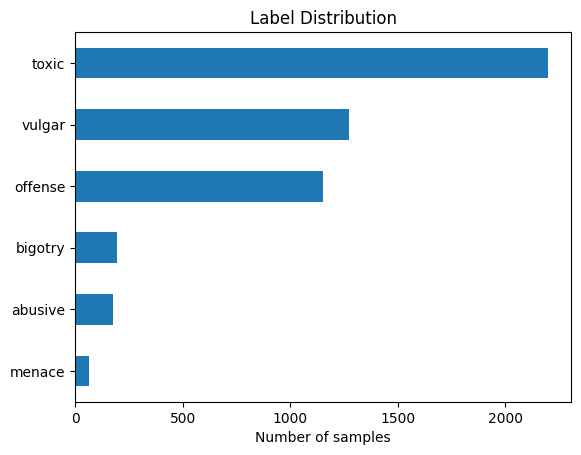

In [8]:
labels = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']
df[labels].sum().sort_values().plot(kind='barh', title='Label Distribution')
plt.xlabel("Number of samples")
plt.show()

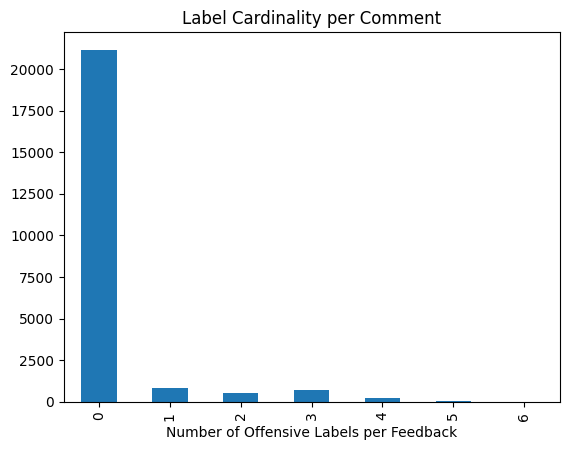

In [9]:
df['num_labels'] = df[labels].sum(axis=1)
df['num_labels'].value_counts().sort_index().plot(kind='bar', title='Label Cardinality per Comment')
plt.xlabel("Number of Offensive Labels per Feedback")
plt.show()

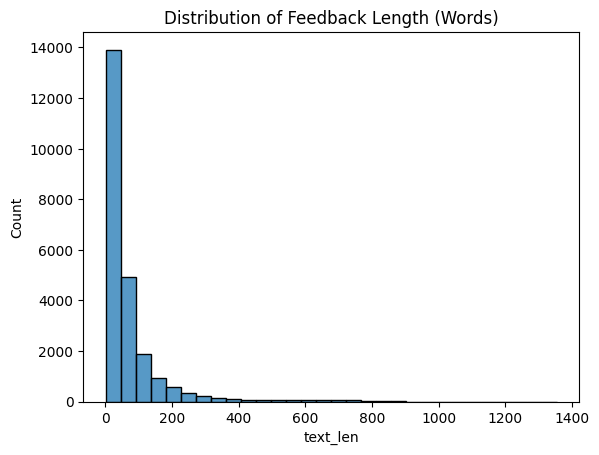

In [10]:
df['text_len'] = df['feedback_text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_len'], bins=30)
plt.title("Distribution of Feedback Length (Words)")
plt.show()

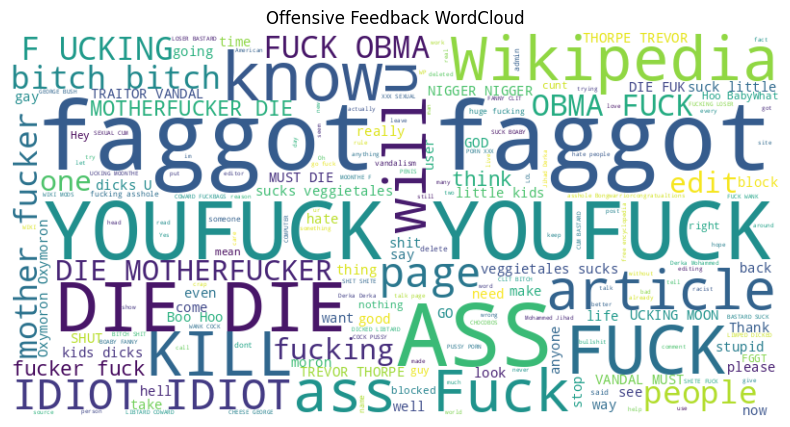

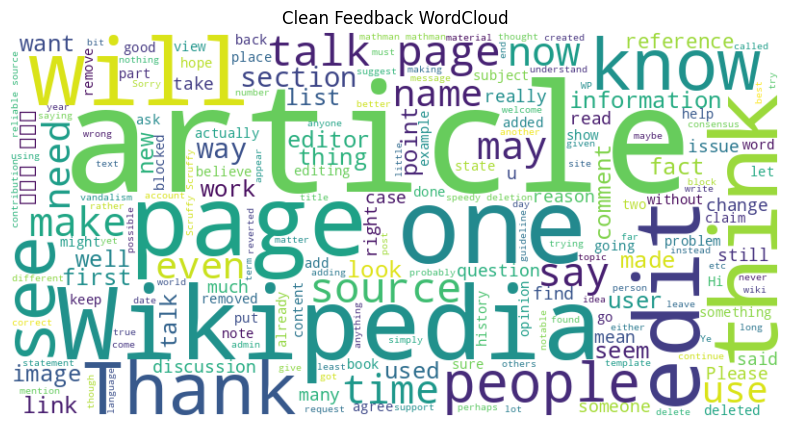

In [11]:
from wordcloud import WordCloud

def show_wordcloud(data, title):
    text = " ".join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Offensive
show_wordcloud(df[df['num_labels'] > 0]['feedback_text'], 'Offensive Feedback WordCloud')

# Clean
show_wordcloud(df[df['num_labels'] == 0]['feedback_text'], 'Clean Feedback WordCloud')


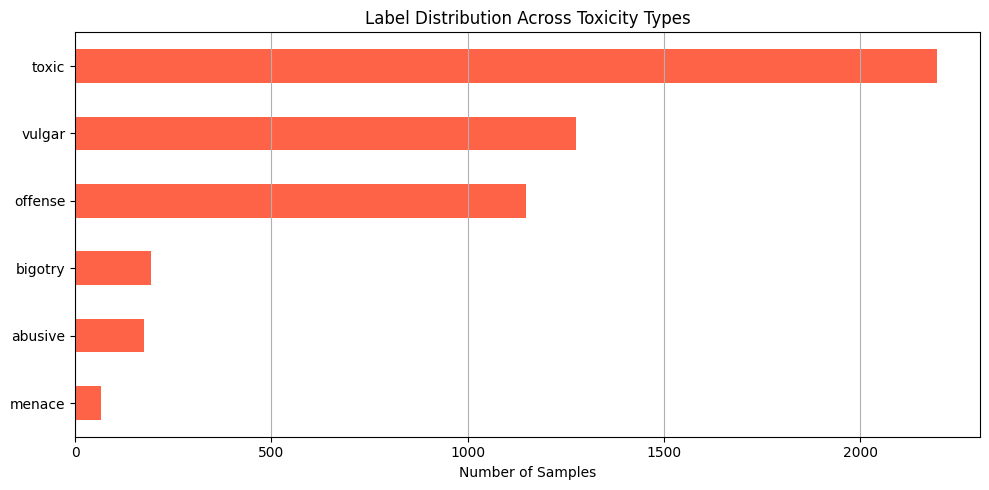

In [12]:
labels = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']

plt.figure(figsize=(10,5))
df[labels].sum().sort_values(ascending=True).plot(kind='barh', color='tomato')
plt.title("Label Distribution Across Toxicity Types")
plt.xlabel("Number of Samples")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [13]:
df['char_count'] = df['feedback_text'].apply(lambda x: len(str(x)))
df['word_count'] = df['feedback_text'].apply(lambda x: len(str(x).split()))


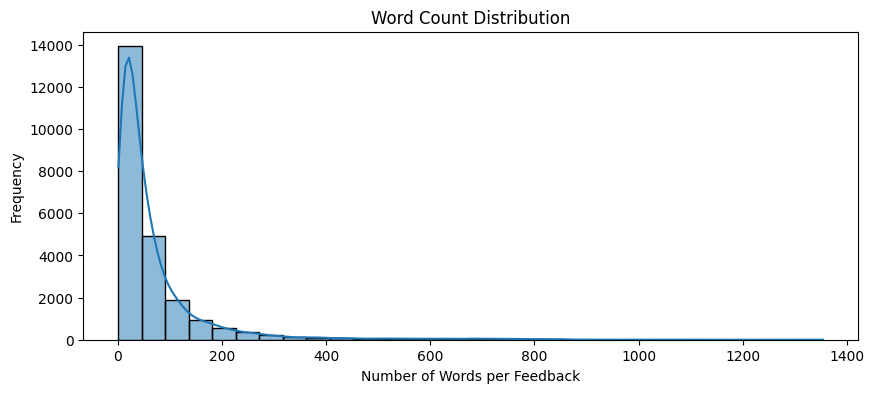

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Number of Words per Feedback")
plt.ylabel("Frequency")
plt.show()


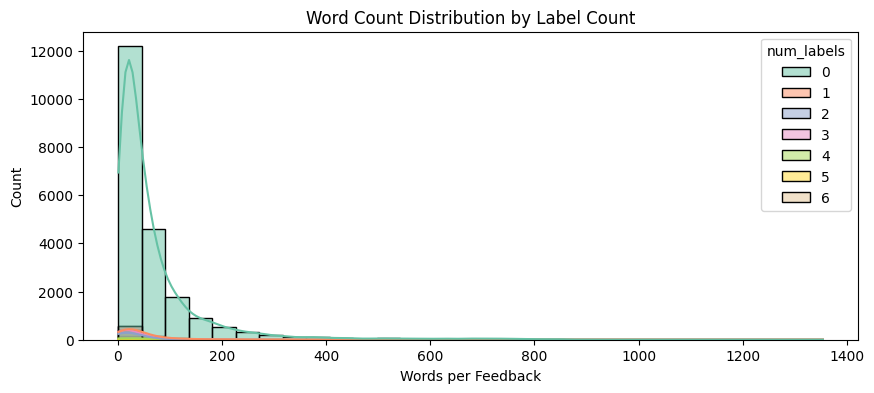

In [15]:
df['num_labels'] = df[labels].sum(axis=1)

plt.figure(figsize=(10,4))
sns.histplot(data=df, x='word_count', hue='num_labels', bins=30, kde=True, palette='Set2')
plt.title("Word Count Distribution by Label Count")
plt.xlabel("Words per Feedback")
plt.ylabel("Count")
plt.show()


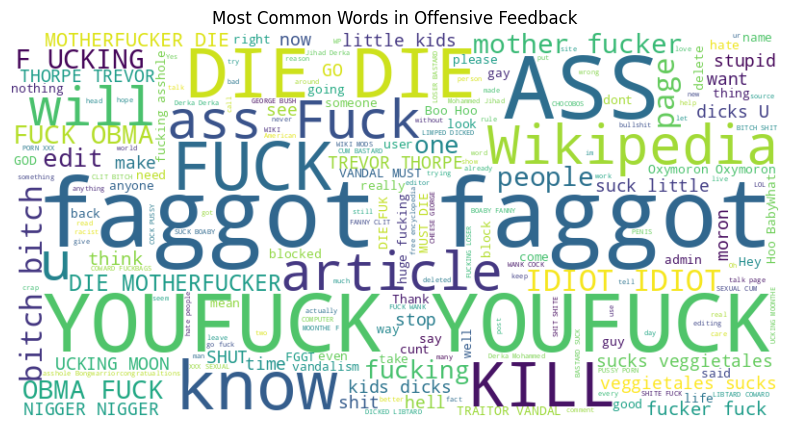

In [16]:
offensive_text = df[df['num_labels'] > 0]['feedback_text'].astype(str).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(offensive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Offensive Feedback")
plt.show()


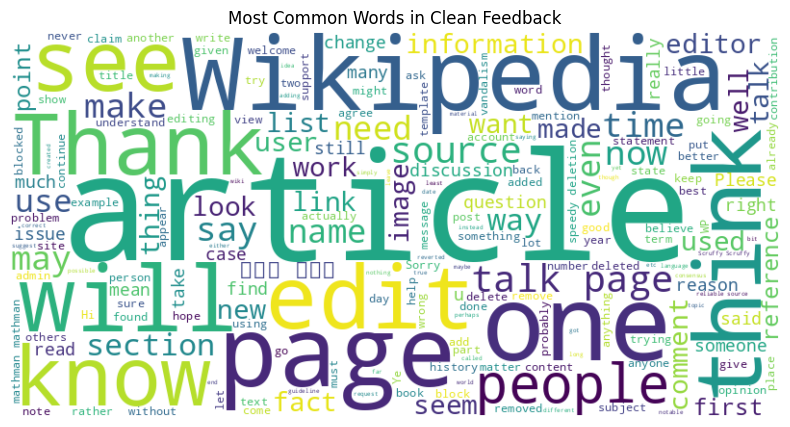

In [17]:
clean_text = df[df['num_labels'] == 0]['feedback_text'].astype(str).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Clean Feedback")
plt.show()


In [18]:
print(df.isnull().sum())

id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
num_labels       0
text_len         0
char_count       0
word_count       0
dtype: int64


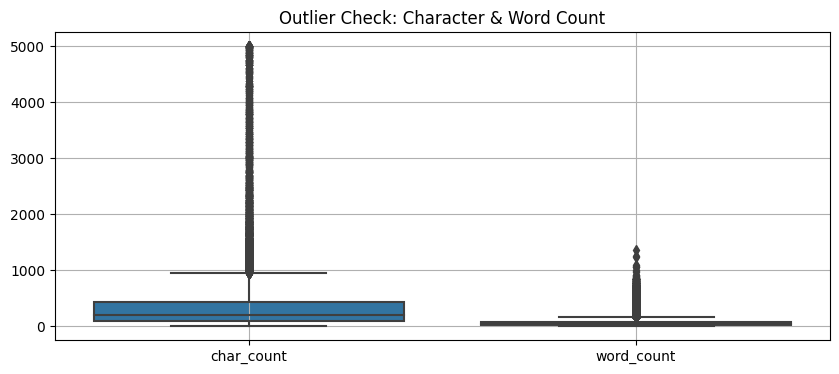

In [19]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df[['char_count', 'word_count']])
plt.title("Outlier Check: Character & Word Count")
plt.grid(True)
plt.show()


# Preprocessing

In [20]:
#df = df[df['word_count'] < 100]  # Example filter


In [21]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters, punctuation, numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(cleaned)


In [23]:
df['clean_text'] = df['feedback_text'].astype(str).apply(clean_text)


In [24]:
df.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry,num_labels,text_len,char_count,word_count,clean_text
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0,0,13,68,13,sound good let know youre done ill start pr
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0,0,85,413,85,say something didnt actually confirm anything ...
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0,0,22,173,22,agustina barrientos modelo de pieiro jun cruz ...
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0,2,10,73,10,fyi enjoy licking stranger scrotal sacksespeci...
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0,0,88,432,88,get site many penguin asked question simple go...


In [25]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
df['tokens'] = df['clean_text'].apply(word_tokenize)


In [27]:
df.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry,num_labels,text_len,char_count,word_count,clean_text,tokens
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0,0,13,68,13,sound good let know youre done ill start pr,"[sound, good, let, know, youre, done, ill, sta..."
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0,0,85,413,85,say something didnt actually confirm anything ...,"[say, something, didnt, actually, confirm, any..."
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0,0,22,173,22,agustina barrientos modelo de pieiro jun cruz ...,"[agustina, barrientos, modelo, de, pieiro, jun..."
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0,2,10,73,10,fyi enjoy licking stranger scrotal sacksespeci...,"[fyi, enjoy, licking, stranger, scrotal, sacks..."
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0,0,88,432,88,get site many penguin asked question simple go...,"[get, site, many, penguin, asked, question, si..."


In [28]:
pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 47.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is inc

In [29]:
df = df.drop('id', axis=1)

In [30]:
df = df.drop('feedback_text', axis=1)

In [31]:
df.head()

,toxic,abusive,vulgar,menace,offense,bigotry,num_labels,text_len,char_count,word_count,clean_text,tokens
0,0,0,0,0,0,0,0,13,68,13,sound good let know youre done ill start pr,"[sound, good, let, know, youre, done, ill, sta..."
1,0,0,0,0,0,0,0,85,413,85,say something didnt actually confirm anything ...,"[say, something, didnt, actually, confirm, any..."
2,0,0,0,0,0,0,0,22,173,22,agustina barrientos modelo de pieiro jun cruz ...,"[agustina, barrientos, modelo, de, pieiro, jun..."
3,1,0,1,0,0,0,2,10,73,10,fyi enjoy licking stranger scrotal sacksespeci...,"[fyi, enjoy, licking, stranger, scrotal, sacks..."
4,0,0,0,0,0,0,0,88,432,88,get site many penguin asked question simple go...,"[get, site, many, penguin, asked, question, si..."


In [32]:
from gensim.models import Word2Vec

# Train Word2Vec on the tokens
w2v_model = Word2Vec(
    sentences=df['tokens'],    # Input: list of word lists
    vector_size=100,           # Output vector size for each word
    window=5,                  # Context window size
    min_count=1,               # Minimum word frequency to include
    workers=4,                 # CPU cores to use
    sg=1                       # Use skip-gram (sg=1), CBOW if sg=0
)

In [33]:
import numpy as np

def get_average_vector(tokens, model, dim=100):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(dim)

# Apply to all feedbacks
X = np.vstack(df['tokens'].apply(lambda x: get_average_vector(x, w2v_model)))


# input and target feature selection before feeding into model

In [34]:
target_cols = ['toxic']
y = df[target_cols].values

In [35]:
import numpy as np

# Select additional features
extra_features = df[['abusive', 'vulgar', 'menace', 'offense', 'bigotry', 'text_len', 'char_count', 'word_count']].values

# Combine Word2Vec + extra features
X_combined = np.hstack([X, extra_features])  # final shape: (n_samples, 103)


# train test split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42
)


In [37]:
df.shape

(23473, 12)

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert token list to sentence string
df['sentence'] = df['tokens'].apply(lambda x: ' '.join(x))

# Tokenize the sentence
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['sentence'])
sequences = tokenizer.texts_to_sequences(df['sentence'])

# Pad sequences
max_len = 100
X_seq = pad_sequences(sequences, maxlen=max_len, padding='post')

# Update y
y = df[target_cols].values


2025-04-13 05:44:05.220587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744523045.399019      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744523045.453700      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# LSTM model building and training

# Toxic or non-toxic classification model training

In [39]:
import tensorflow as tf

vocab_size = len(tokenizer.word_index) + 1

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(target_cols), activation='sigmoid')  # multi-label output
])

model_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_lstm.summary()


I0000 00:00:1744523058.039948      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744523058.040654      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, random_state=42)

history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


I0000 00:00:1744523063.928165     127 cuda_dnn.cc:529] Loaded cuDNN version 90300


587/587 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9006 - loss: 0.3922 - val_accuracy: 0.9131 - val_loss: 0.2247
Epoch 2/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9367 - loss: 0.1787 - val_accuracy: 0.9412 - val_loss: 0.1797
Epoch 3/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9665 - loss: 0.1050 - val_accuracy: 0.9442 - val_loss: 0.1563
Epoch 4/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9815 - loss: 0.0549 - val_accuracy: 0.9406 - val_loss: 0.1901
Epoch 5/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9908 - loss: 0.0301 - val_accuracy: 0.9357 - val_loss: 0.2174
Epoch 6/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9932 - loss: 0.0231 - val_accuracy: 0.9327 - val_loss: 0.2626
Epoch 7/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9953 - loss: 0.0174 - val_accuracy: 0.9399 - val_loss: 0.2737
Epoch 8/10
587/587 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9975 - loss: 0.0109 - val_accuracy: 0.93

# Classification report

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predicted probabilities
y_pred_prob = model_lstm.predict(X_test)

# Convert probabilities to binary using threshold
y_pred = (y_pred_prob >= 0.5).astype(int)

# Compute metrics (micro: all labels equally; macro: average over labels; samples: per sample)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy: 0.9378
Precision (macro): 0.8285
Recall (macro): 0.7697
F1-score (macro): 0.7954


# ROC curve

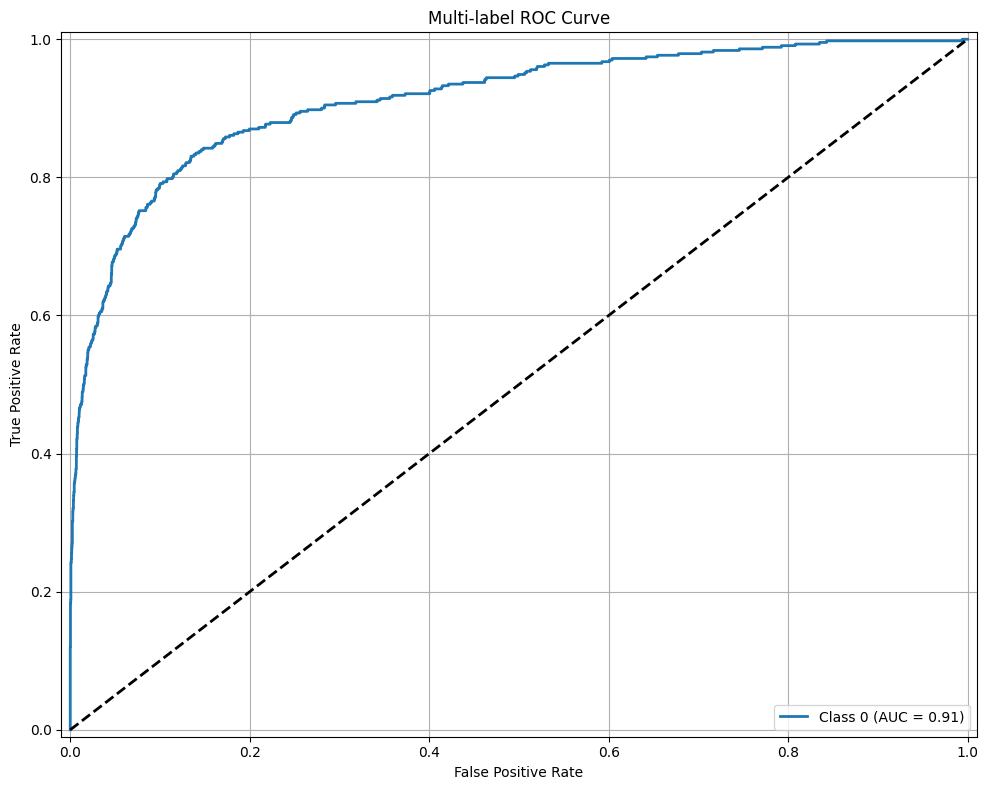

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming y_test and y_pred_prob are numpy arrays of shape (n_samples, n_classes)

n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i),
             lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-label ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


In [43]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [44]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode
encodings = bert_tokenizer(
    df['sentence'].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='tf'
)

X_input_ids = encodings['input_ids']
X_attention = encodings['attention_mask']


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

# BERT model building and training

In [45]:
from transformers import TFBertModel
import tensorflow as tf

bert_base = TFBertModel.from_pretrained('bert-base-uncased')

input_ids = tf.keras.Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.Input(shape=(128,), dtype=tf.int32, name='attention_mask')

# Wrap in Lambda with output_shape specified
def extract_pooled_output(inputs):
    input_ids, attention_mask = inputs
    output = bert_base(input_ids=input_ids, attention_mask=attention_mask, return_dict=True)
    return output.pooler_output  # shape: (None, 768)

pooled_output = tf.keras.layers.Lambda(
    extract_pooled_output,
    output_shape=(768,)
)([input_ids, attention_mask])

x = tf.keras.layers.Dense(64, activation='relu')(pooled_output)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(len(target_cols), activation='sigmoid')(x)

model_bert = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model_bert.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_bert.summary()


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)    │ (None, 128)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_mask            │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 768)            │              0 │ input_ids[0][0],       │
│                           │                        │                │ attention_mask[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │         49,216 │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 49,281 (192.50 KB)

 Trainable params: 49,281 (192.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

# Assuming you have your data loaded into these variables:
# X_input_ids: TensorFlow tensor of shape (num_samples, sequence_length)  OR NumPy array
# X_attention: TensorFlow tensor of shape (num_samples, sequence_length)  OR NumPy array
# y: TensorFlow tensor of shape (num_samples, num_classes) or (num_samples,) OR NumPy array
# target_cols: List of target columns. Important for the model definition.

# 1. Split the data (convert to NumPy arrays if they are TensorFlow tensors)
if isinstance(X_input_ids, tf.Tensor):
    X_input_ids_np = X_input_ids.numpy()
else:
    X_input_ids_np = X_input_ids  # Assume it's already a NumPy array

if isinstance(X_attention, tf.Tensor):
    X_attention_np = X_attention.numpy()
else:
    X_attention_np = X_attention

if isinstance(y, tf.Tensor):
    y_np = y.numpy()
else:
    y_np = y

X_train_ids_np, X_test_ids_np, X_train_mask_np, X_test_mask_np, y_train_np, y_test_np = train_test_split(
    X_input_ids_np, X_attention_np, y_np, test_size=0.2, random_state=42
)

# 2. Convert NumPy arrays to TensorFlow tensors
X_train_ids = tf.convert_to_tensor(X_train_ids_np, dtype=tf.int32)
X_test_ids = tf.convert_to_tensor(X_test_ids_np, dtype=tf.int32)
X_train_mask = tf.convert_to_tensor(X_train_mask_np, dtype=tf.int32)
X_test_mask = tf.convert_to_tensor(X_test_mask_np, dtype=tf.int32)
y_train = tf.convert_to_tensor(y_train_np, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test_np, dtype=tf.float32)

# 3. Fit the model
history = model_bert.fit(
    {'input_ids': X_train_ids, 'attention_mask': X_train_mask},
    y_train,
    validation_data=(
        {'input_ids': X_test_ids, 'attention_mask': X_test_mask},
        y_test
    ),
    epochs=13,
    batch_size=16,
)


Epoch 1/13


I0000 00:00:1744523204.541569     129 service.cc:148] XLA service 0x2aad5e50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744523204.542448     129 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744523204.542468     129 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
W0000 00:00:1744523205.017889     129 assert_op.cc:38] Ignoring Assert operator functional_1_1/lambda_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


   1/1174 ━━━━━━━━━━━━━━━━━━━━ 6:46:30 21s/step - accuracy: 0.5625 - loss: 0.6815

I0000 00:00:1744523209.340305     129 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1173/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8925 - loss: 0.3579

W0000 00:00:1744523332.089532     130 assert_op.cc:38] Ignoring Assert operator functional_1_1/lambda_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8925 - loss: 0.3579

W0000 00:00:1744523340.268653     129 assert_op.cc:38] Ignoring Assert operator functional_1_1/lambda_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert
W0000 00:00:1744523375.287038     129 assert_op.cc:38] Ignoring Assert operator functional_1_1/lambda_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 188s 143ms/step - accuracy: 0.8925 - loss: 0.3579 - val_accuracy: 0.9082 - val_loss: 0.3058
Epoch 2/13
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 175s 149ms/step - accuracy: 0.9076 - loss: 0.3138 - val_accuracy: 0.9082 - val_loss: 0.3049
Epoch 3/13
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 176s 150ms/step - accuracy: 0.9065 - loss: 0.3136 - val_accuracy: 0.9082 - val_loss: 0.3055
Epoch 4/13
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 177s 151ms/step - accuracy: 0.9074 - loss: 0.3099 - val_accuracy: 0.9082 - val_loss: 0.3053
Epoch 5/13
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 177s 151ms/step - accuracy: 0.9052 - loss: 0.3153 - val_accuracy: 0.9082 - val_loss: 0.3053
Epoch 6/13
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 176s 150ms/step - accuracy: 0.9061 - loss: 0.3151 - val_accuracy: 0.9082 - val_loss: 0.3043
Epoch 7/13
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 170s 145ms/step - accuracy: 0.9092 - loss: 0.3052 - val_accuracy: 0.9082 - val_loss: 0.3052
Epoch 8/13
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 168s 143ms/step - accuracy: 0.9

# Classification report

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 4. Predict on test data
y_pred_probs = model_bert.predict({'input_ids': X_test_ids, 'attention_mask': X_test_mask})
y_pred = (y_pred_probs > 0.5).astype(int)  # Thresholding for multi-label

# 5. Convert y_test to NumPy (if still tensor)
y_test_np = y_test.numpy()

# 6. Compute metrics
accuracy = accuracy_score(y_test_np, y_pred)
precision = precision_score(y_test_np, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test_np, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test_np, y_pred, average='macro', zero_division=0)

# 7. Print
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


W0000 00:00:1744525438.901839     129 assert_op.cc:38] Ignoring Assert operator functional_1_1/lambda_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


146/147 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step

W0000 00:00:1744525481.077069     128 assert_op.cc:38] Ignoring Assert operator functional_1_1/lambda_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


147/147 ━━━━━━━━━━━━━━━━━━━━ 47s 289ms/step
Accuracy:  0.9082
Precision: 0.4541
Recall:    0.5000
F1-score:  0.4759


# ROC curve

147/147 ━━━━━━━━━━━━━━━━━━━━ 36s 246ms/step


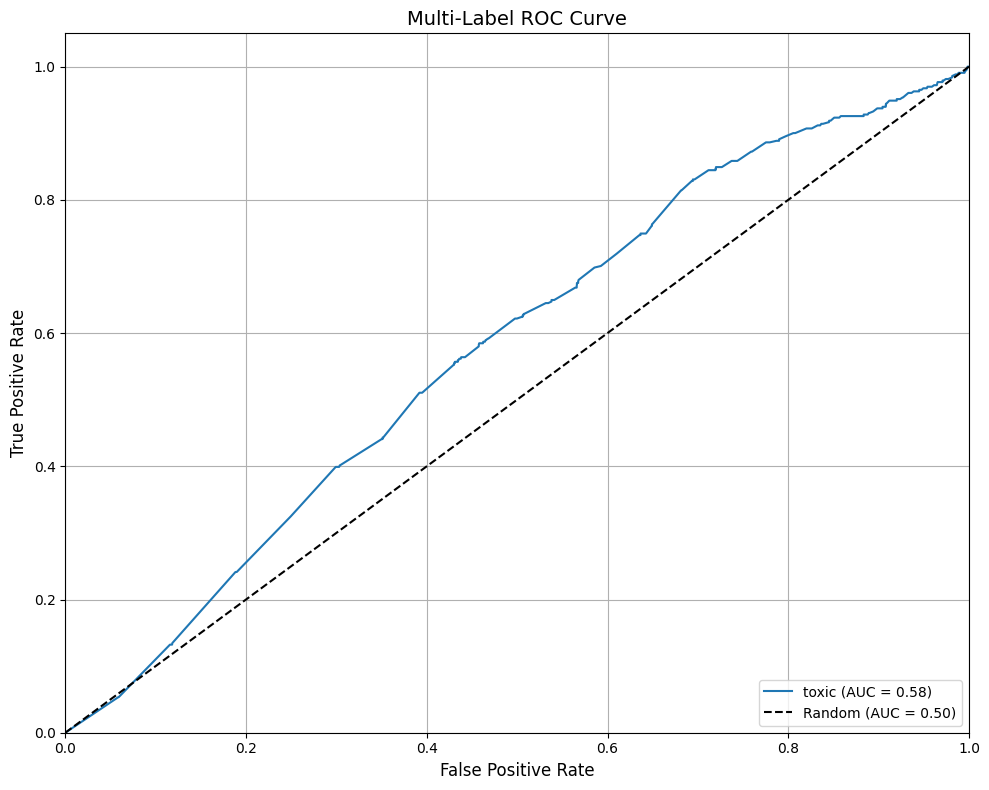

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# 1. Predict probabilities for the test set
y_pred_prob = model_bert.predict({'input_ids': X_test_ids, 'attention_mask': X_test_mask})

# 2. Ensure your y_test is in NumPy format (already done above)
# If y_test has shape (num_samples,), binarize it for binary/multiclass cases
# Not needed if it's already shape (num_samples, num_classes)

# 3. Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(target_cols)

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_np[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{target_cols[i]} (AUC = {roc_auc[i]:.2f})')

# 4. Plot configuration
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Label ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 5: Model Tuning and Optimization
# Experiment with different optimizers (Adam, SGD, etc.) and activation functions
# Adjust learning rate, batch size, and number of epochs


**As I have already built and trained models, experimenting with different optimizers and activation functions and adjusting the learning rate, batch size, and number of epochs is not a complex task. Due to some constraints like time, device, internet, etc., I can't do it practically. But I am explaining how to do those things and where to change the values. I am marking these values or points in one or two images. We can iterate through different values of those important things**

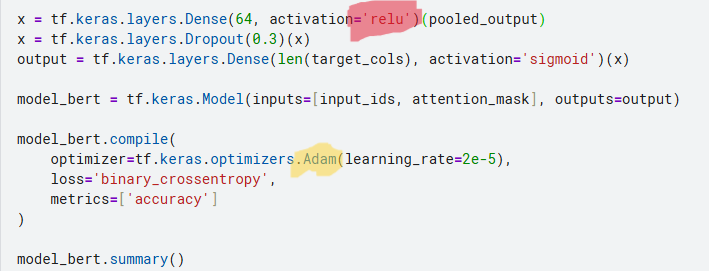

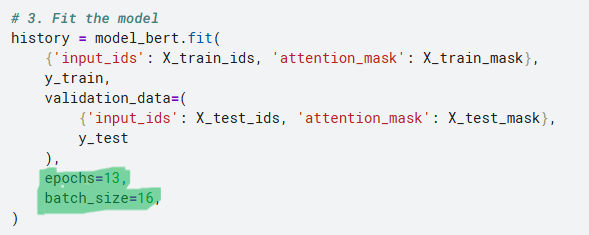